In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import wrangle

___
## Call the data sets

In [2]:
air = wrangle.clean_air()
air.head(1)

,datetime,Pm1_0,Pm2_5,Pm10,SO2,O3,CO,NO2,alert_triggered,dates,...,weekday,AQI_CO,CO_24hr,AQI_CO_24hr,AQI_pm2_5,Pm_25_24hr,AQI_pm_25_24hr,AQI_pm10,Pm_10_24hr,AQI_pm10_24hr
0,2021-05-16 00:01:26,8,7,8,0,0,0,0,None,2021-05-16,...,6,Good,-165.666667,NaN,Good,6.246528,Good,Good,-159.733796,NaN


In [3]:
air = air.replace(to_replace=-999, value=0)

More info on air quality (idea is to make a level of air quality)
- https://forum.airnowtech.org/t/the-aqi-equation/169
- https://forum.airnowtech.org/t/aqi-calculations-overview-ozone-pm2-5-and-pm10/168
- https://www.airnow.gov/aqi/aqi-basics/
- https://fit.thequint.com/health-news/explaining-air-quality-index#read-more
- https://www.airnow.gov/sites/default/files/2020-05/aqi-technical-assistance-document-sept2018.pdf
- https://www.epa.gov/sites/production/files/2014-05/documents/zell-aqi.pdf
- 

In [4]:
#air['dates'] = pd.to_datetime(air['datetime']).dt.date
#air['time'] = pd.to_datetime(air['datetime']).dt.time
#air['hour'] = pd.to_datetime(air['datetime']).dt.hour
#air['weekday'] = pd.to_datetime(air['datetime']).dt.weekday

In [5]:
#pm_25_24hr = air.groupby('dates', as_index=False)['Pm2_5'].mean()
#pm_25_24hr.sample()

In [6]:
#pm_25_24hr= pm_25_24hr.rename(columns={'Pm2_5':'Pm_25_24hr'})
#pm_25_24hr.sample()

In [7]:
#air = air.merge(pm_25_24hr, on = 'dates', how ='left')
#air.sample()

In [8]:
#air['AQI_pm_25_24hr'] = pd.cut(air.CO, 
                            #bins = [-1,12.1,35.5,55.5,150.5,250.5,4000],
                            #labels = ['Good', 'Moderate', 
                                      #'Unhealthy for Sensitive Groups', "Unhealthy", 
                                      #"Very Unhealthy", 'Hazardous'])
#air.sample()

In [9]:
#df = air[air.CO == -999]
#df

In [10]:
air_train, air_validate, air_test = wrangle.split_data(air)

In [11]:
flood = wrangle.clean_flood()
flood.head(1)

,datetime,sensor_to_water_feet,sensor_to_water_meters,sensor_to_ground_feet,sensor_to_ground_meters
0,2021-05-15 00:11:55,13.090551,3.99,13.500656,4.115


In [58]:
flood['flood_depth_feet'] = flood.sensor_to_ground_feet - flood.sensor_to_water_feet
flood['flood_depth_meters'] = flood.sensor_to_ground_meters - flood.sensor_to_water_meters

In [59]:
flood.head(1)

,datetime,sensor_to_water_feet,sensor_to_water_meters,sensor_to_ground_feet,sensor_to_ground_meters,flood_depth_feet,flood_depth_meters
0,2021-05-15 00:11:55,13.090551,3.99,13.500656,4.115,0.410105,0.125


In [12]:
flood_train, flood_validate, flood_test = wrangle.split_data(flood)

In [13]:
weather = wrangle.wrangle_weather()
weather.head(1)

,datetime,celsius,farenheit,humidity,dewpoint_celsius,dewpoint_farenheit,pressure
0,2021-05-16 00:01:26,21,71,88,18.934569,66.082224,979


In [14]:
weather_train, weather_validate, weather_test = wrangle.split_data(weather)

In [15]:
sound = wrangle.wrangle_sound()
sound.head(1)

,DateTime,NoiseLevel_db
0,2021-05-16 00:01:26,60


In [16]:
sound_train, sound_validate, sound_test = wrangle.split_data(sound)

In [17]:
saws = wrangle.wrangle_saws()
saws.head(1)

Record #,274262,274263,274264,274266,274267,274268,274269,274270,274271,274272,...,544498,545902,545903,545905,545906,545908,545909,545910,545911,545913
17-JAN,6733,5237,2992,4489,0,748,2992,748,17206,748,...,14214,5237,6733,8229,4489,2244,5985,5985,5985,7481


In [18]:
saws_train, saws_validate, saws_test = wrangle.split_data(saws)

___
# Explore Air Quality

### Questions we asked about air quality
- Are there spikes in air quality at certain times or days?
- Is air quality and water consumption worse on the weekends?
- How is the air quality after it floods?
- What type of weather has the best air quality?
- As air quality gets worse water consumption goes up.
- Does air quality influence water consumption?

In [19]:
air.head(1)

,datetime,Pm1_0,Pm2_5,Pm10,SO2,O3,CO,NO2,alert_triggered,dates,...,weekday,AQI_CO,CO_24hr,AQI_CO_24hr,AQI_pm2_5,Pm_25_24hr,AQI_pm_25_24hr,AQI_pm10,Pm_10_24hr,AQI_pm10_24hr
0,2021-05-16 00:01:26,8,7,8,0,0,0,0,None,2021-05-16,...,6,Good,-165.666667,NaN,Good,6.246528,Good,Good,-159.733796,NaN



## Univariate Exploration

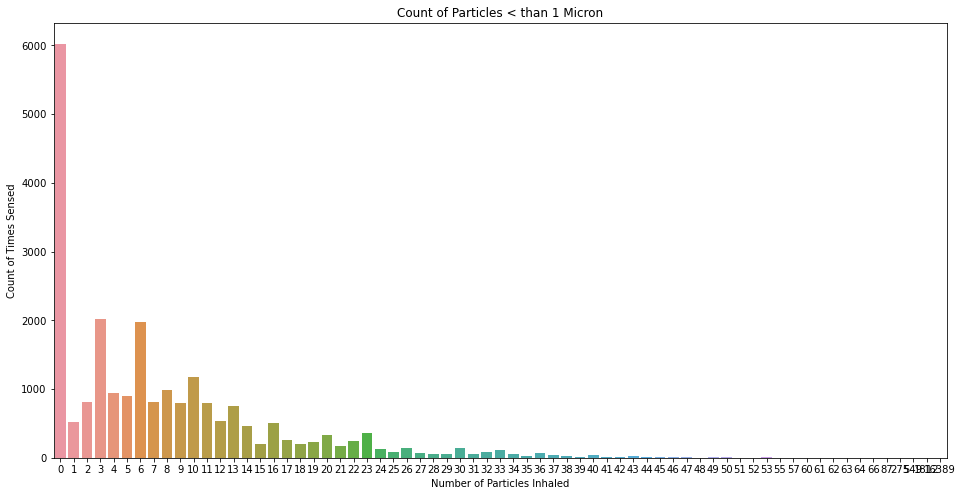

In [20]:
plt.figure(figsize=(16,8))
sns.countplot(data=air, x='Pm1_0')
plt.title('Count of Particles < than 1 Micron')
plt.xlabel('Number of Particles Inhaled')
plt.ylabel('Count of Times Sensed')
plt.show()

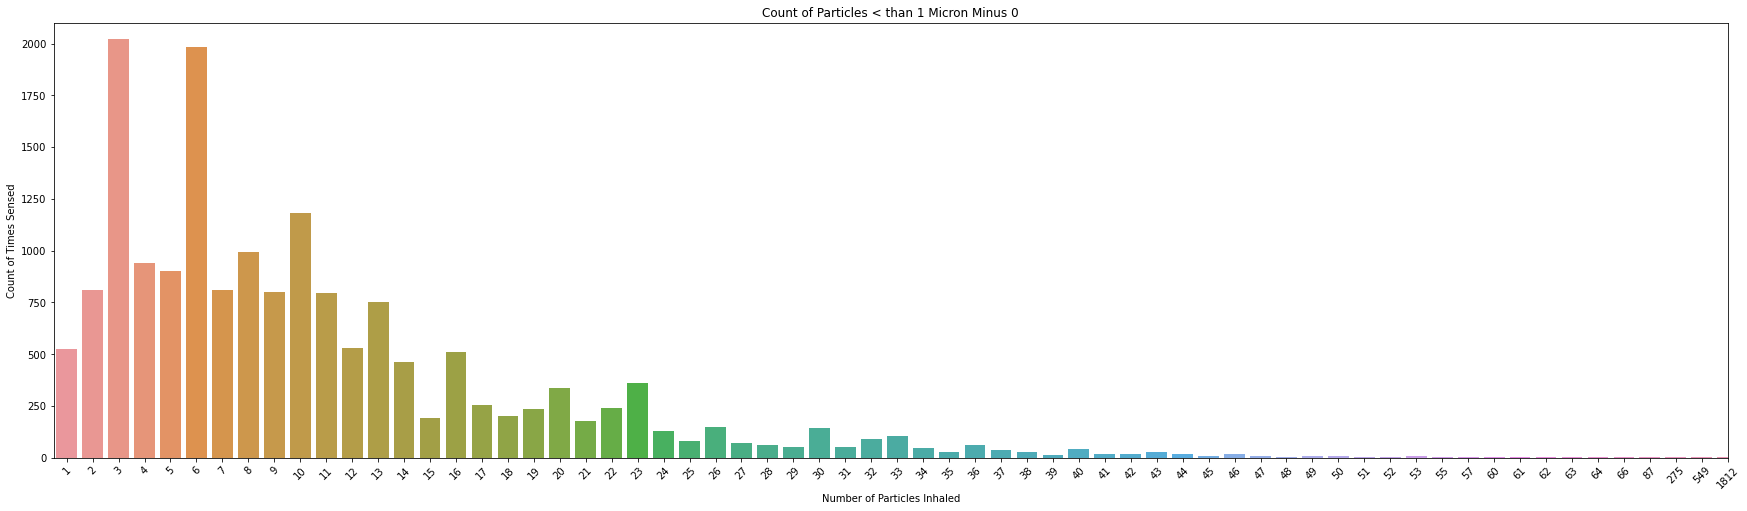

In [21]:
plt.figure(figsize=(30,8))
plot = sns.countplot(data=air, x='Pm1_0')
plot.set(xlim=(0.5, 65))
plot.set(ylim=(0, 2100))
plt.xticks(rotation=45)
plt.title('Count of Particles < than 1 Micron Minus 0')
plt.xlabel('Number of Particles Inhaled')
plt.ylabel('Count of Times Sensed')
plt.show()

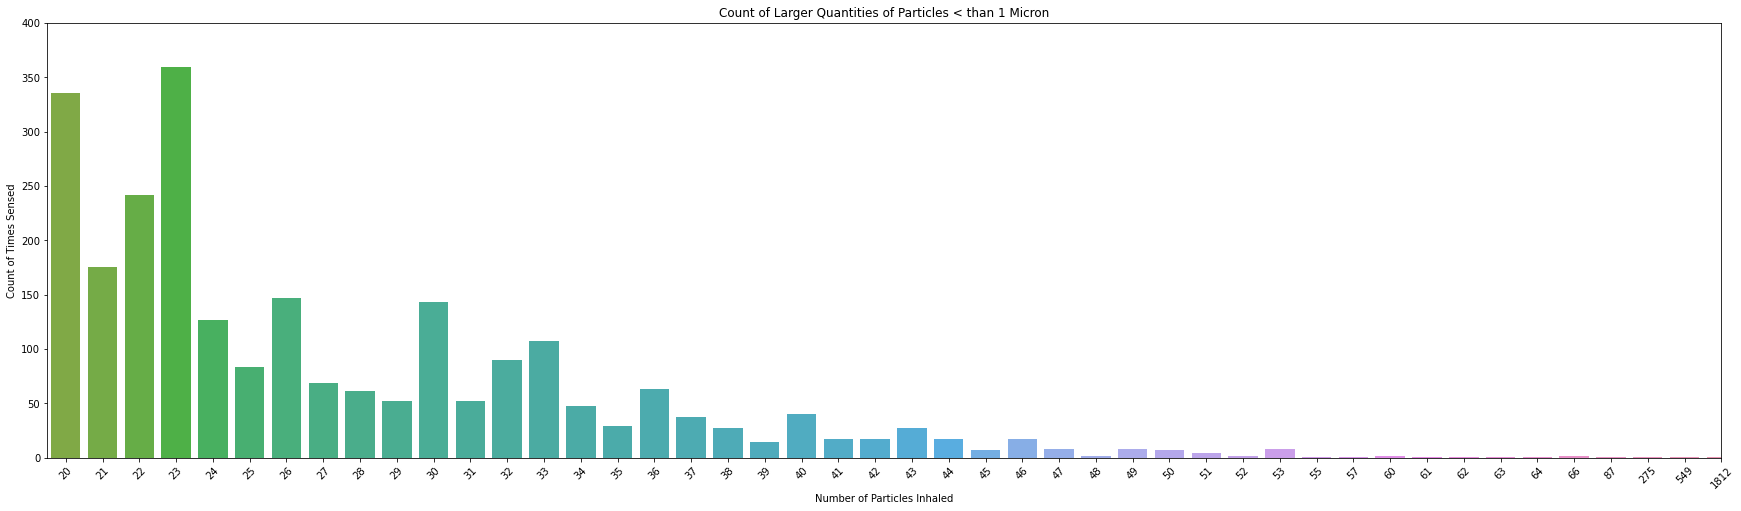

In [22]:
plt.figure(figsize=(30,8))
plot = sns.countplot(data=air, x='Pm1_0')
plot.set(xlim=(19.5, 65))
plot.set(ylim=(0, 400))
plt.xticks(rotation=45)
plt.title('Count of Larger Quantities of Particles < than 1 Micron')
plt.xlabel('Number of Particles Inhaled')
plt.ylabel('Count of Times Sensed')
plt.show()

In [23]:
air.Pm1_0.value_counts()

0        6024
3        2022
6        1982
10       1182
8         992
         ... 
55          1
87          1
16389       1
57          1
63          1
Name: Pm1_0, Length: 67, dtype: int64

### Takeaways:
- Top 5 readings are at 0, 3, 6, 10, and 8
- The higher the reading the less often it is being read
- when looking closer at the higher reading you can see small spikes at 50, 43, and 53
    - keep in mind these are only being considered "spikes" when also looking at the surrounding reading totals.
___

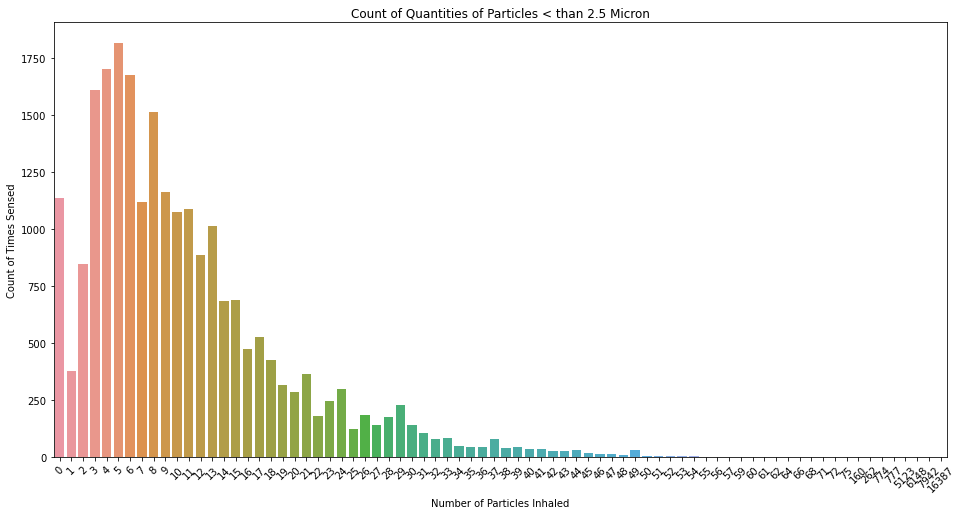

In [24]:
plt.figure(figsize=(16,8))
sns.countplot(data=air, x='Pm2_5')
plt.xticks(rotation=45)
plt.title('Count of Quantities of Particles < than 2.5 Micron')
plt.xlabel('Number of Particles Inhaled')
plt.ylabel('Count of Times Sensed')
plt.show()

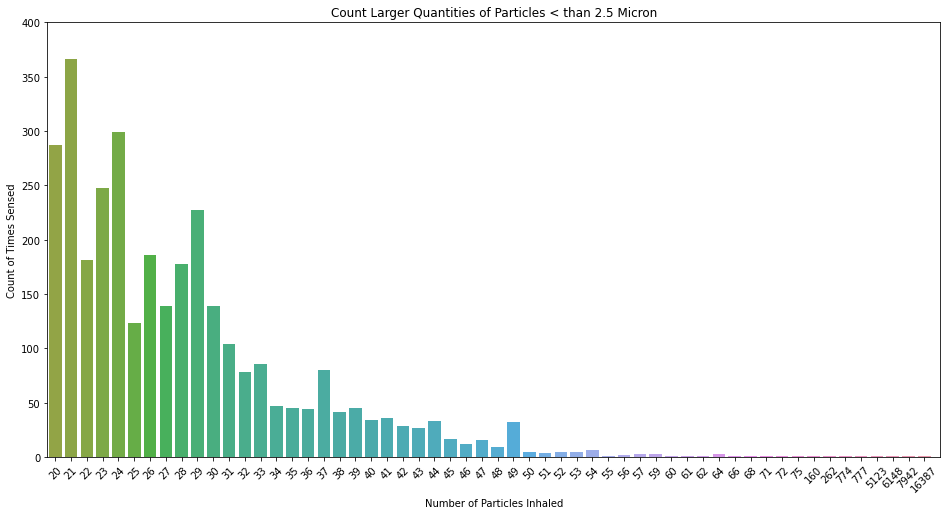

In [25]:
plt.figure(figsize=(16,8))
plot = sns.countplot(data=air, x='Pm2_5')
plot.set(xlim=(19.5, 76))
plot.set(ylim=(0, 400))
plt.xticks(rotation=45)
plt.title('Count Larger Quantities of Particles < than 2.5 Micron')
plt.xlabel('Number of Particles Inhaled')
plt.ylabel('Count of Times Sensed')
plt.show()

In [26]:
air.Pm2_5.value_counts()

5       1816
4       1704
6       1674
3       1611
8       1512
        ... 
71         1
55         1
6148       1
62         1
61         1
Name: Pm2_5, Length: 76, dtype: int64

### Takeaways:
- Top 5 readings are at 5, 4, 6, 3, and 8
- The higher the reading the less often it is being read
- when looking closer at the higher reading you can see small spikes at 21,29, 37, and 49
    - keep in mind these are only being considered "spikes" when also looking at the surrounding reading totals.

___

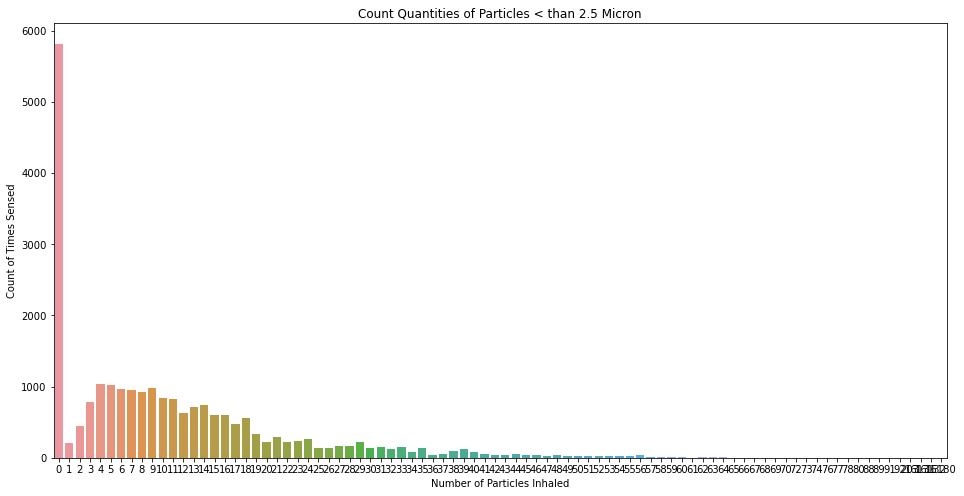

In [27]:
plt.figure(figsize=(16,8))
sns.countplot(data=air, x='Pm10')
plt.title('Count Quantities of Particles < than 2.5 Micron')
plt.xlabel('Number of Particles Inhaled')
plt.ylabel('Count of Times Sensed')
plt.show()

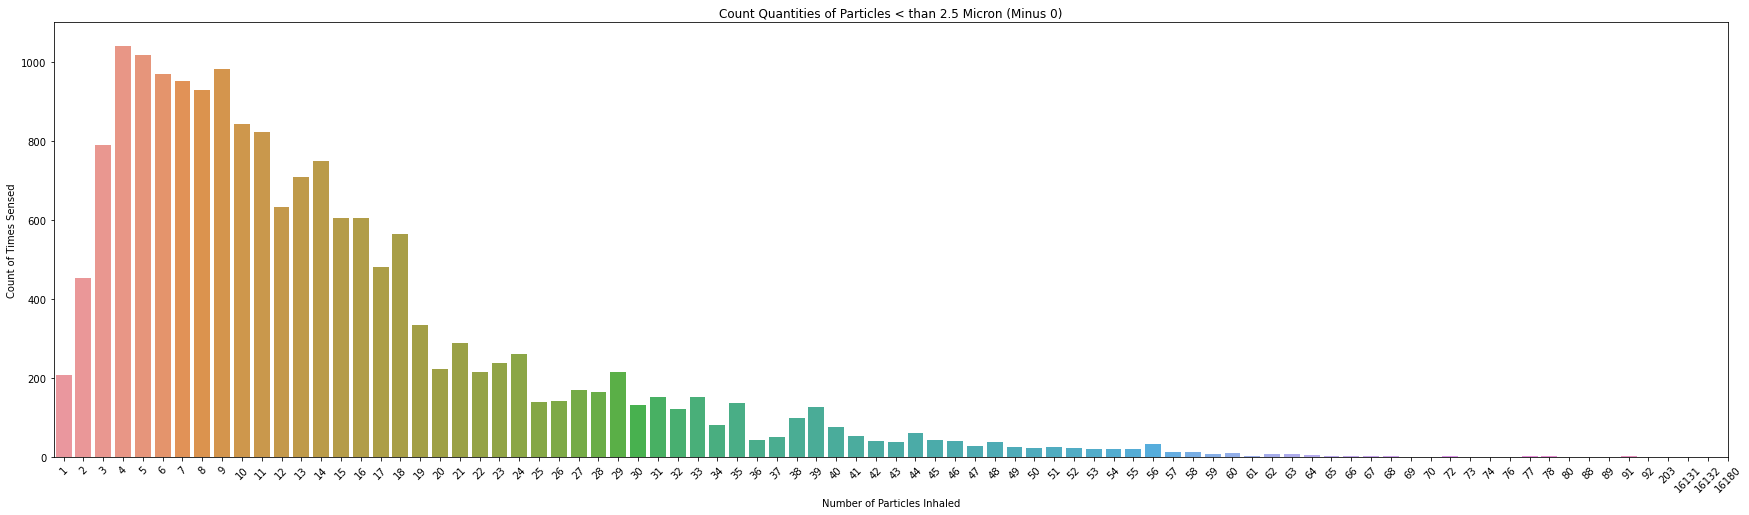

In [28]:
plt.figure(figsize=(30,8))
plot = sns.countplot(data=air, x='Pm10')
plot.set(xlim=(0.5, 85))
plot.set(ylim=(0, 1100))
plt.xticks(rotation=45)
plt.title('Count Quantities of Particles < than 2.5 Micron (Minus 0)')
plt.xlabel('Number of Particles Inhaled')
plt.ylabel('Count of Times Sensed')
plt.show()

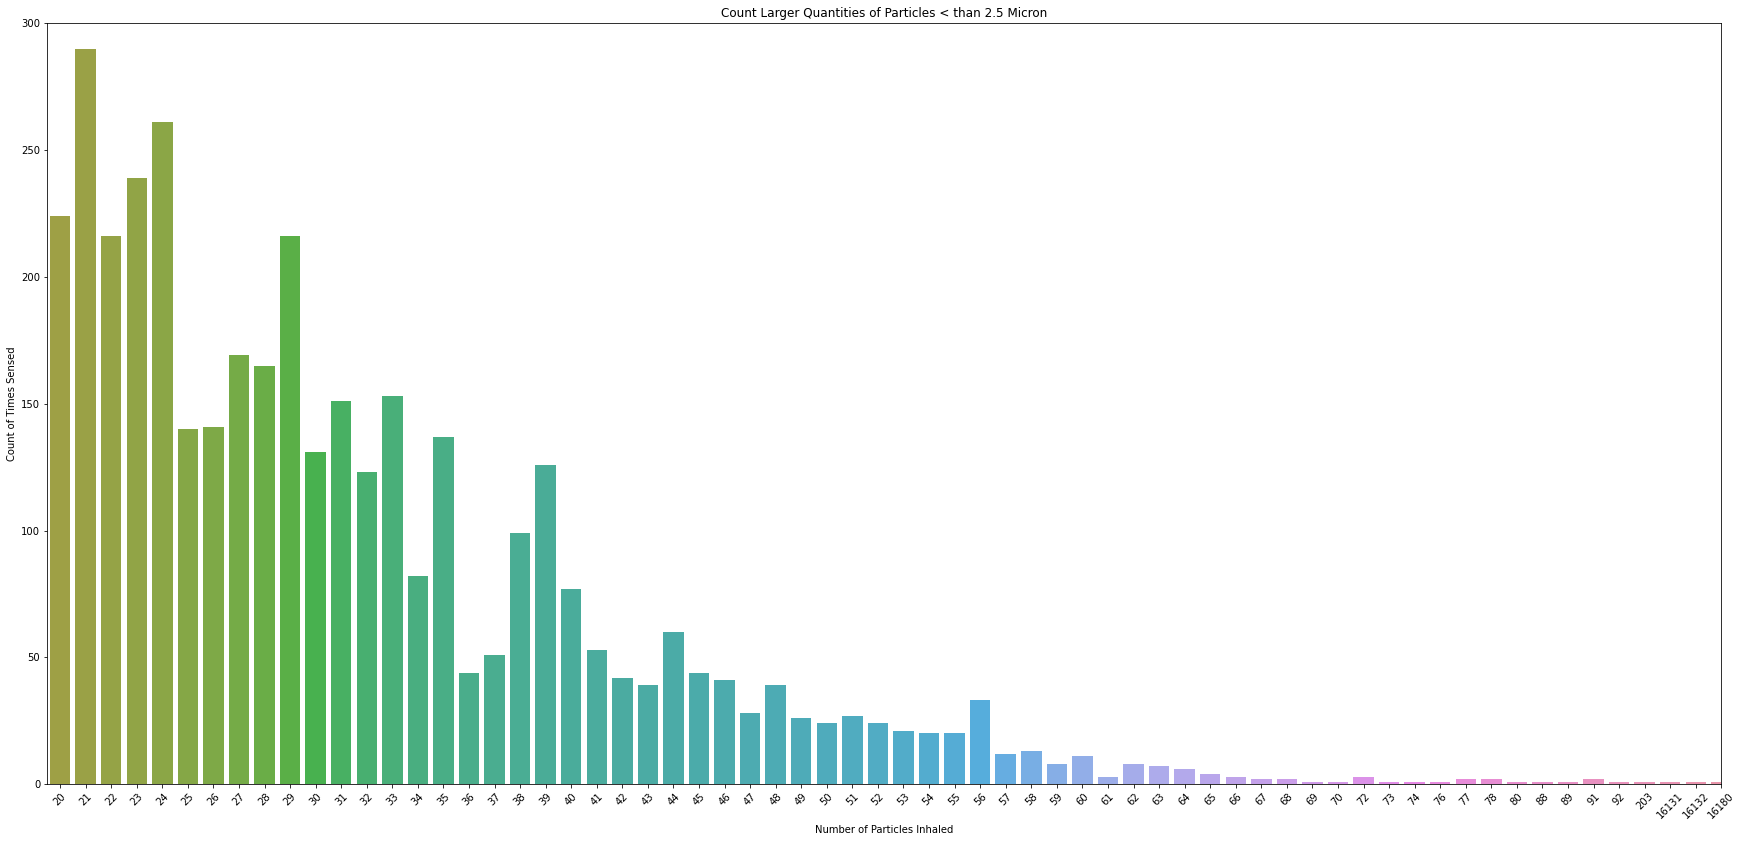

In [29]:
plt.figure(figsize=(30,14))
plot = sns.countplot(data=air, x='Pm10')
plot.set(xlim=(19.5, 85))
plot.set(ylim=(0, 300))
plt.xticks(rotation=45)
plt.title('Count Larger Quantities of Particles < than 2.5 Micron')
plt.xlabel('Number of Particles Inhaled')
plt.ylabel('Count of Times Sensed')
plt.show()

In [30]:
air.Pm10.value_counts()

0        5819
4        1041
5        1018
9         982
6         970
         ... 
16132       1
16180       1
88          1
70          1
74          1
Name: Pm10, Length: 86, dtype: int64

### Takeaways:
- Top 5 readings are at 0, 4, 5, 9, and 6
- The higher the reading the less often it is being read
- when looking closer at the higher reading you can see small spikes at 29, 35, 39, and 56
    - keep in mind these are only being considered "spikes" when also looking at the surrounding reading totals.
___

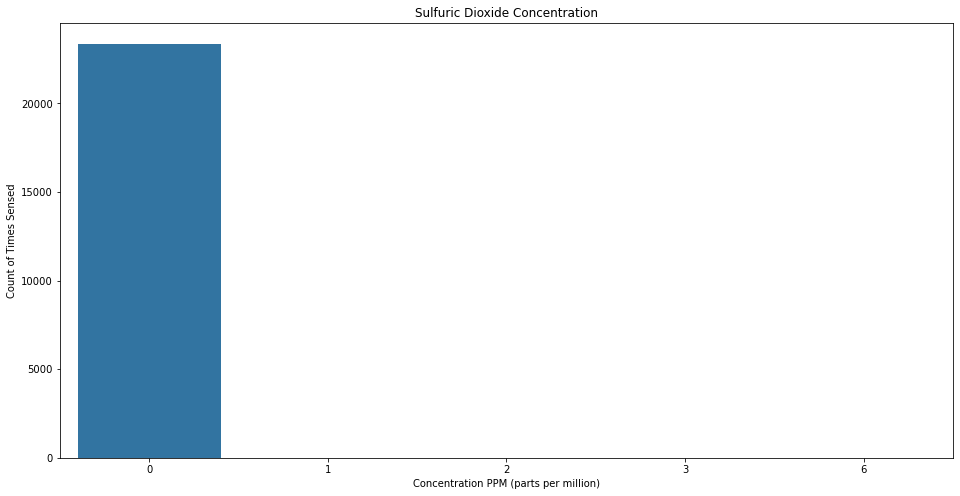

In [31]:
plt.figure(figsize=(16,8))
sns.countplot(data=air, x='SO2')
plt.title('Sulfuric Dioxide Concentration')
plt.xlabel('Concentration PPM (parts per million)')
plt.ylabel('Count of Times Sensed')
plt.show()

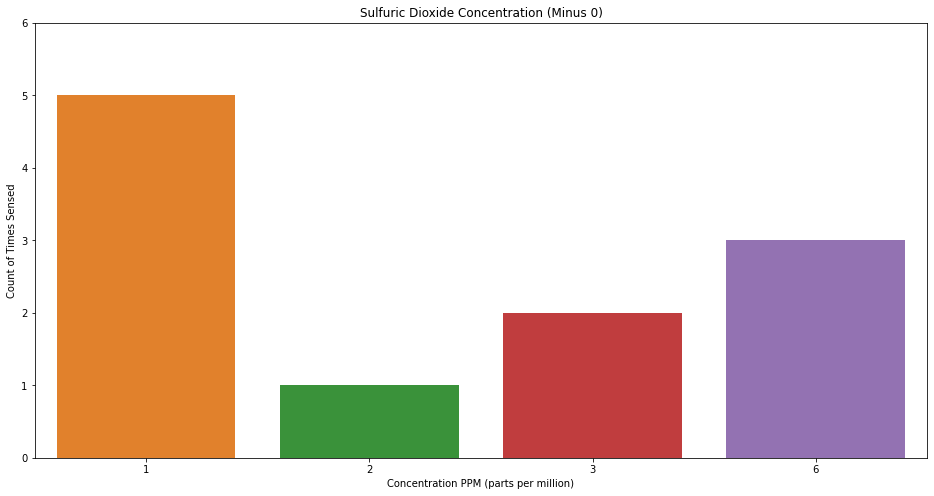

In [32]:
plt.figure(figsize=(16,8))
plot = sns.countplot(data=air, x='SO2')
plot.set(xlim=(0.5, 4.5))
plot.set(ylim=(0, 6))
plt.title('Sulfuric Dioxide Concentration (Minus 0)')
plt.xlabel('Concentration PPM (parts per million)')
plt.ylabel('Count of Times Sensed')
plt.show()

In [33]:
air.SO2.value_counts()

0    23368
1        5
6        3
3        2
2        1
Name: SO2, dtype: int64

### Takeaways:
- There are barley and readings outside of no reading for SO2

___

Text(0, 0.5, 'Count of Times Sensed')

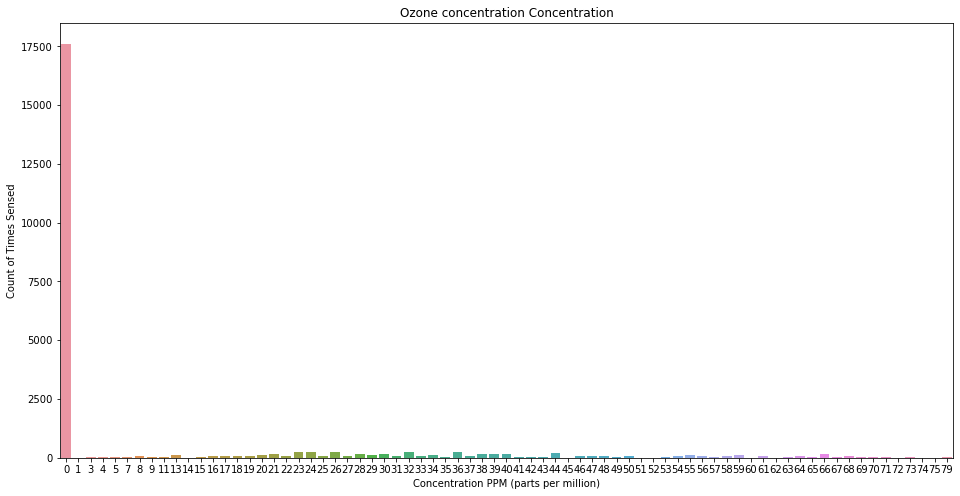

In [34]:
plt.figure(figsize=(16,8))
sns.countplot(data=air, x='O3')
plt.title('Ozone concentration Concentration')
plt.xlabel('Concentration PPM (parts per million)')
plt.ylabel('Count of Times Sensed')

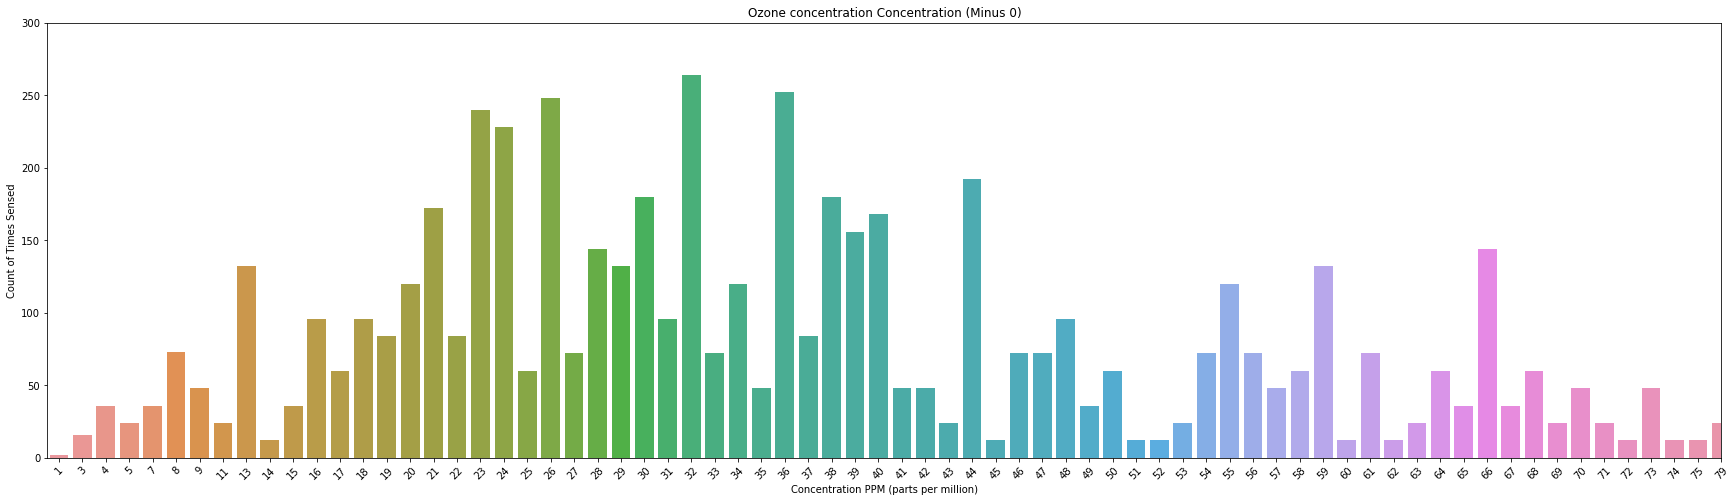

In [35]:
plt.figure(figsize=(30,8))
plot = sns.countplot(data=air, x='O3')
plot.set(xlim=(0.5, 72))
plot.set(ylim=(0, 300))
plt.xticks(rotation=45)
plt.title('Ozone concentration Concentration (Minus 0)')
plt.xlabel('Concentration PPM (parts per million)')
plt.ylabel('Count of Times Sensed')
plt.show()

In [36]:
air.O3.value_counts()

0     17612
32      264
36      252
26      248
23      240
      ...  
74       12
14       12
52       12
45       12
1         2
Name: O3, Length: 73, dtype: int64

### Takeaways:
- Top 5 readings are at 0, 32, 36, 26, and 23
- There is no obvious trends
- There are large spikes throughout all levels of concentration.
___ 

Text(0, 0.5, 'Count of Times Sensed')

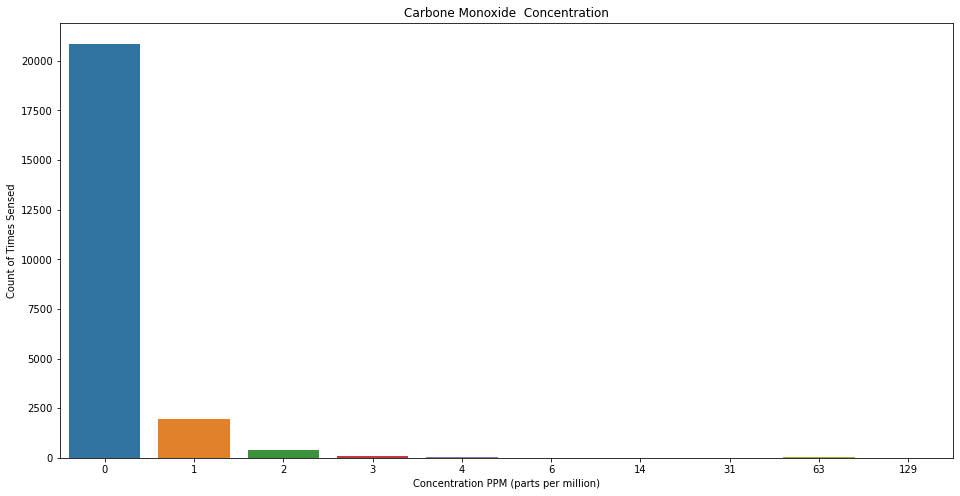

In [37]:
plt.figure(figsize=(16,8))
sns.countplot(data=air, x='CO')
plt.title('Carbone Monoxide  Concentration')
plt.xlabel('Concentration PPM (parts per million)')
plt.ylabel('Count of Times Sensed')

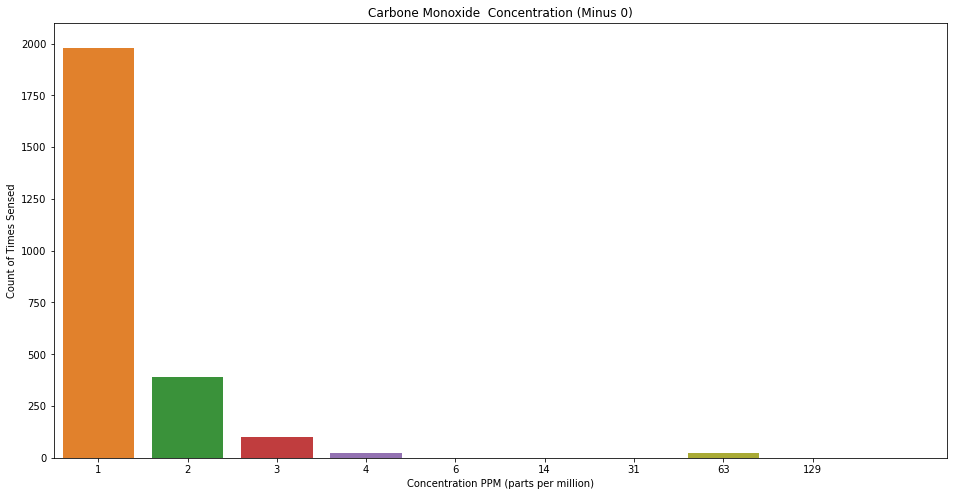

In [38]:
plt.figure(figsize=(16,8))
plot = sns.countplot(data=air, x='CO')
plot.set(xlim=(0.5, 10.5))
plot.set(ylim=(0, 2100))
plt.title('Carbone Monoxide  Concentration (Minus 0)')
plt.xlabel('Concentration PPM (parts per million)')
plt.ylabel('Count of Times Sensed')
plt.show()

In [39]:
air.CO.value_counts()

0      20861
1       1978
2        391
3        102
4         22
63        21
31         1
14         1
6          1
129        1
Name: CO, dtype: int64

### Takeaways:
- The higher the concentration the lower the amount of times it has been recorded.
- spike at 63
    - concentration of 63 was read 21 times but everything after 4 has only been picked up 1 time each.

___

Text(0, 0.5, 'Count of Times Sensed')

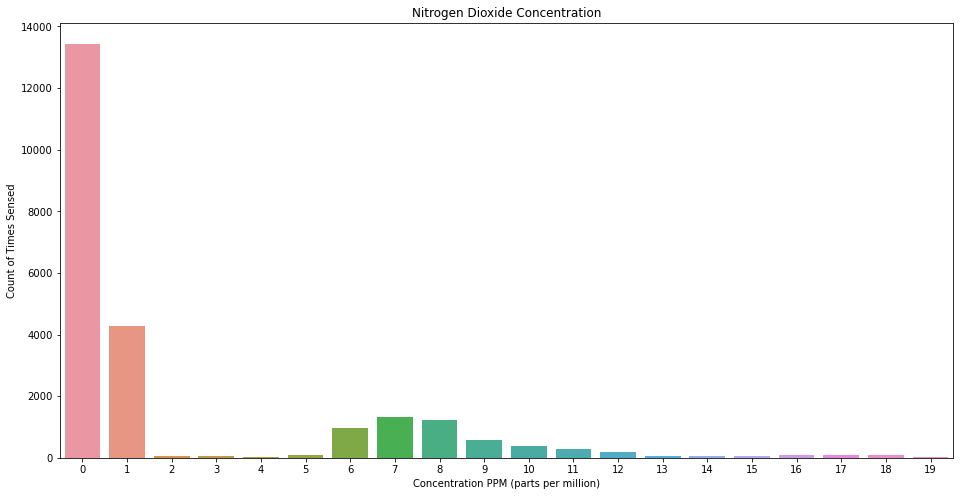

In [40]:
plt.figure(figsize=(16,8))
sns.countplot(data=air, x='NO2')
plt.title('Nitrogen Dioxide Concentration')
plt.xlabel('Concentration PPM (parts per million)')
plt.ylabel('Count of Times Sensed')

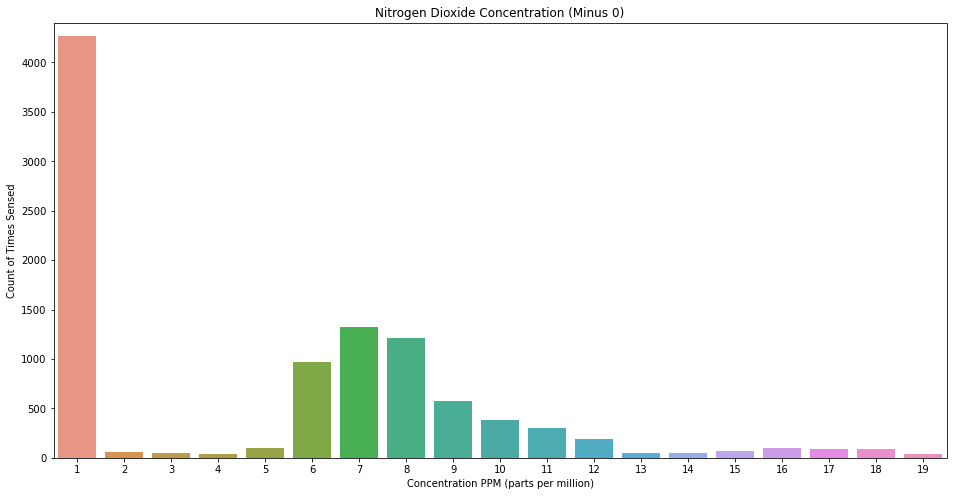

In [41]:
plt.figure(figsize=(16,8))
plot = sns.countplot(data=air, x='NO2')
plot.set(xlim=(0.5, 19.5))
plot.set(ylim=(0, 4400))
plt.title('Nitrogen Dioxide Concentration (Minus 0)')
plt.xlabel('Concentration PPM (parts per million)')
plt.ylabel('Count of Times Sensed')
plt.show()

In [42]:
air.NO2.value_counts()

0     13442
1      4271
7      1320
8      1212
6       972
9       576
10      384
11      300
12      192
16       96
5        96
18       84
17       84
15       72
2        60
14       49
13       49
3        48
4        36
19       36
Name: NO2, dtype: int64

### Takeaways:
- Top 5 readings are at 0, 1, 7, 8, and 6
- Barely and readings between 2-5 and 13-19

___

Text(0, 0.5, 'Number of Times it Tiggered an Alert')

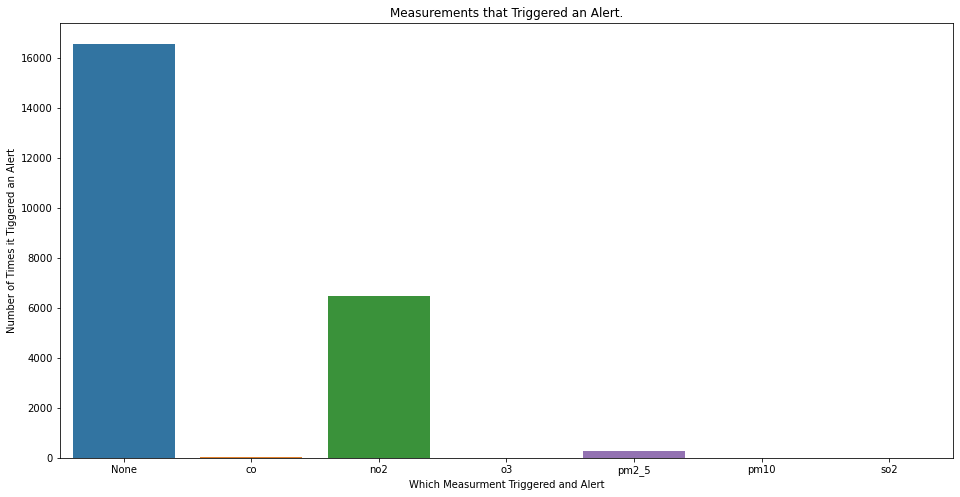

In [43]:
plt.figure(figsize=(16,8))
sns.countplot(data=air, x='alert_triggered')
plt.title('Measurements that Triggered an Alert.')
plt.xlabel('Which Measurment Triggered and Alert')
plt.ylabel('Number of Times it Tiggered an Alert')

Text(0, 0.5, 'Number of Times it Tiggered an Alert')

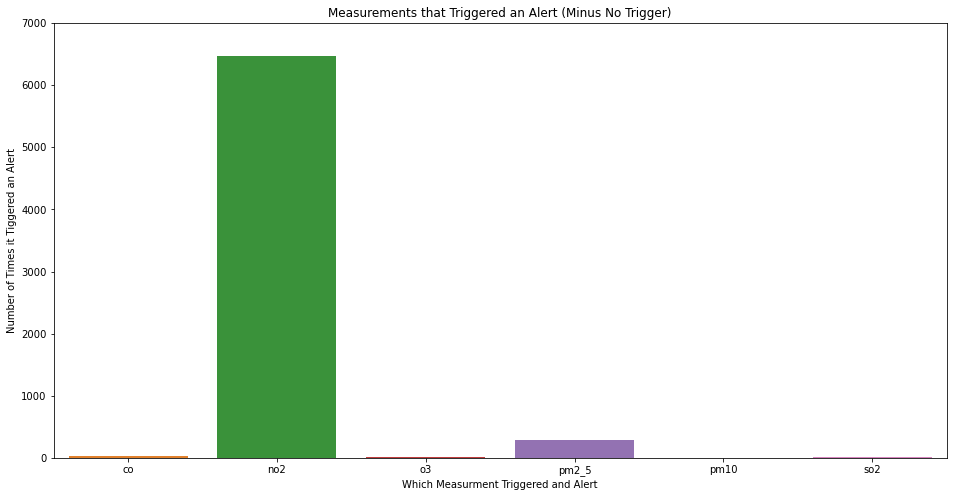

In [44]:
plt.figure(figsize=(16,8))
plot = sns.countplot(data=air, x='alert_triggered')
plot.set(xlim=(0.5, 6.5))
plot.set(ylim=(0, 7000))
plt.title('Measurements that Triggered an Alert (Minus No Trigger)')
plt.xlabel('Which Measurment Triggered and Alert')
plt.ylabel('Number of Times it Tiggered an Alert')

In [45]:
air.alert_triggered.value_counts()

None     16576
no2       6464
pm2_5      292
co          24
so2         13
o3           7
pm10         3
Name: alert_triggered, dtype: int64

### Takeaways:
- Nitrogen Dioxide mostly contributes to being a trigger.
___

## Bivariate

### Questions we asked about air quality
- Are there spikes in air quality at certain times or days?
- Is air quality and water consumption worse on the weekends?
- How is the air quality after it floods?
- What type of weather has the best air quality?
- As air quality gets worse water consumption goes up.
- Does air quality influence water consumption?

In [46]:
air_train.head(1)

,datetime,Pm1_0,Pm2_5,Pm10,SO2,O3,CO,NO2,alert_triggered,dates,...,weekday,AQI_CO,CO_24hr,AQI_CO_24hr,AQI_pm2_5,Pm_25_24hr,AQI_pm_25_24hr,AQI_pm10,Pm_10_24hr,AQI_pm10_24hr
5457,2021-05-08 08:30:26,6,8,10,0,0,2,0,None,2021-05-08,...,5,Good,-450.048513,NaN,Good,10.161189,Good,Good,-443.153365,NaN


Text(0.5, 1.0, 'Sales Amount by Weekday')

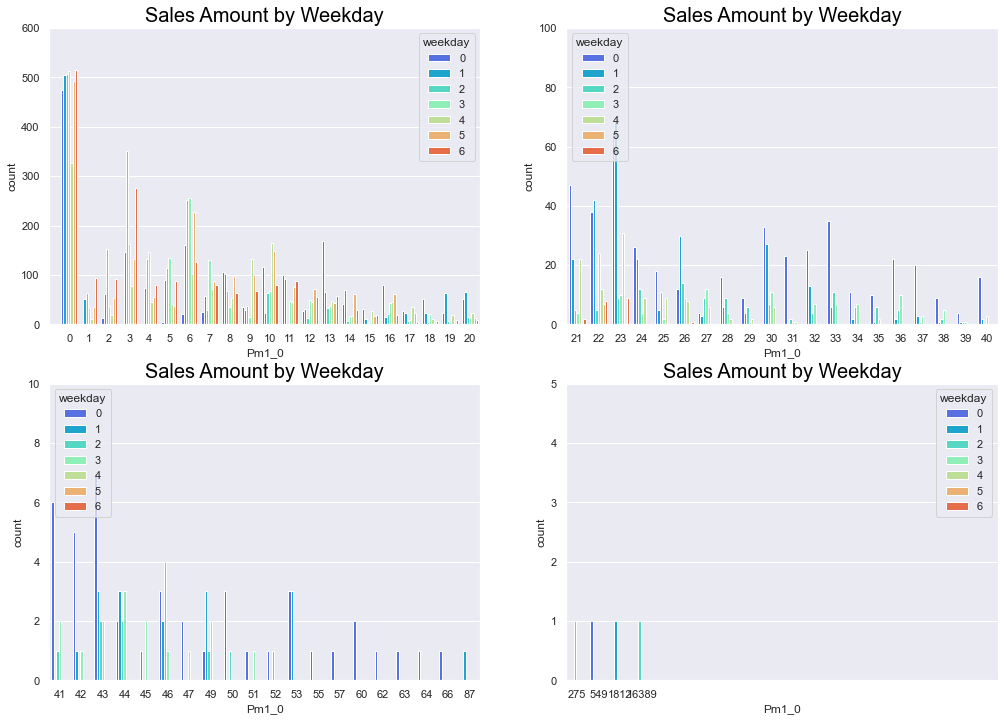

In [47]:
plt.subplots(2, 2, figsize=(17,12), sharey=True)
sns.set(style="darkgrid")

plt.subplot(2,2,1)
plot = sns.countplot(data = air_train, hue='weekday', x = 'Pm1_0', palette='rainbow')
plot.set(xlim=(-1, 20.5))
plot.set(ylim=(0, 600))
plt.title('Sales Amount by Weekday', size=20, color='black')

plt.subplot(2,2,2)
plot = sns.countplot(data = air_train, hue='weekday', x = 'Pm1_0', palette='rainbow')
plot.set(xlim=(20.5, 40.5))
plot.set(ylim=(0, 100))
plt.title('Sales Amount by Weekday', size=20, color='black')

plt.subplot(2,2,3)
plot = sns.countplot(data = air_train, hue='weekday', x = 'Pm1_0', palette='rainbow')
plot.set(xlim=(40.5, 60.5))
plot.set(ylim=(0, 10))
plt.title('Sales Amount by Weekday', size=20, color='black')

plt.subplot(2,2,4)
plot = sns.countplot(data = air_train, hue='weekday', x = 'Pm1_0', palette='rainbow')
plot.set(xlim=(60.5, 80.5))
plot.set(ylim=(0, 5))
plt.title('Sales Amount by Weekday', size=20, color='black')

Text(0, 0.5, 'Number of Times it Tiggered an Alert')

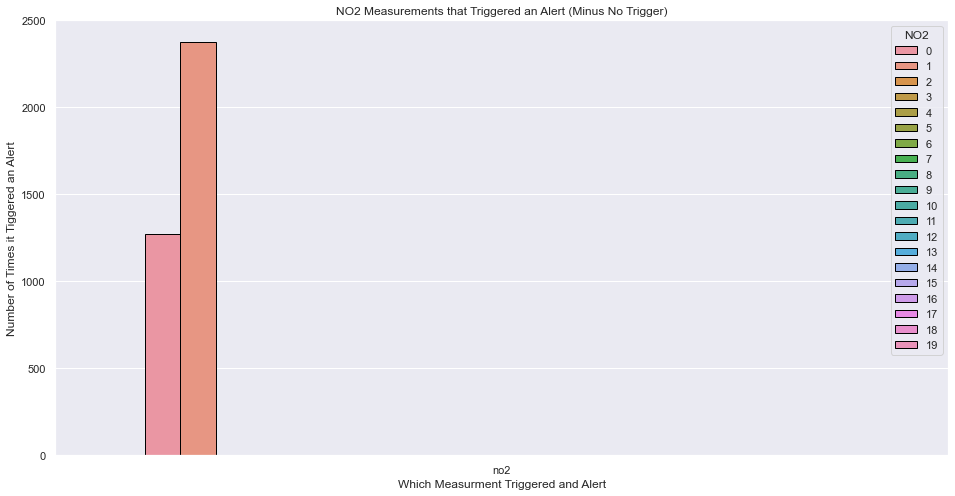

In [48]:
plt.figure(figsize=(16,8))
plot = sns.countplot(data=air_train, x='alert_triggered', hue='NO2', edgecolor='black')
plot.set(xlim=(0.5, 1.5))
plot.set(ylim=(0, 2500))
plt.title('NO2 Measurements that Triggered an Alert (Minus No Trigger)')
plt.xlabel('Which Measurment Triggered and Alert')
plt.ylabel('Number of Times it Tiggered an Alert')

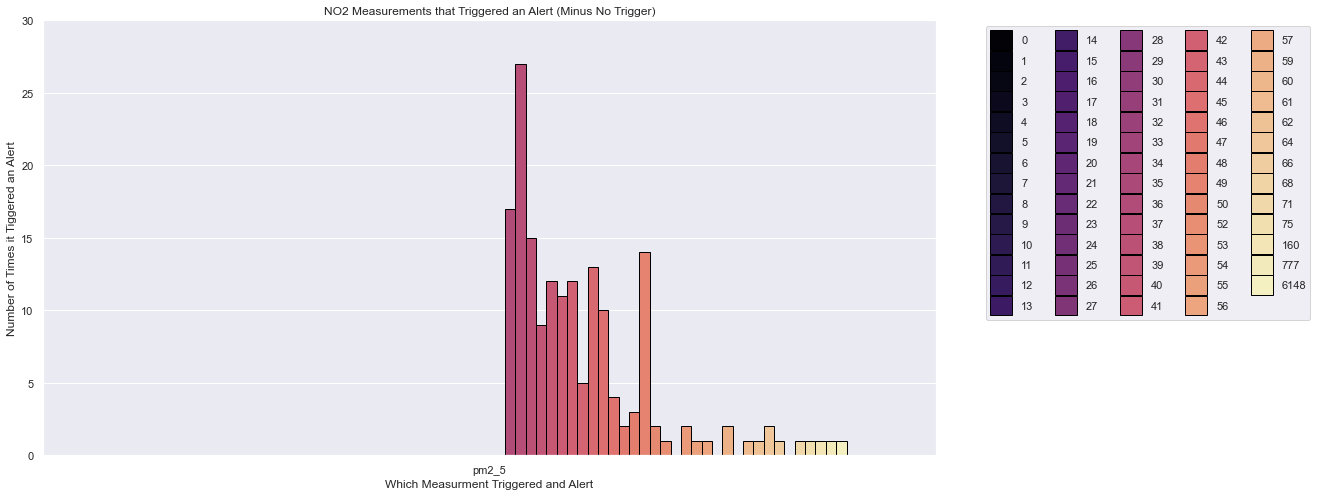

In [49]:
plt.figure(figsize=(16,8))
plot = sns.countplot(data=air_train, x='alert_triggered', hue='Pm2_5', palette='magma',edgecolor='black')
plot.set(xlim=(1.5, 2.5))
plot.set(ylim=(0, 30))
plt.title('NO2 Measurements that Triggered an Alert (Minus No Trigger)')
plt.xlabel('Which Measurment Triggered and Alert')
plt.ylabel('Number of Times it Tiggered an Alert')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=5,handleheight=2.4, labelspacing=0.05)


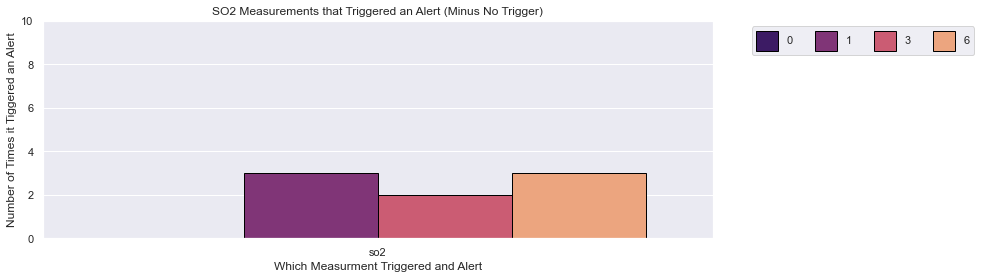

In [50]:
plt.figure(figsize=(12,4))
plot = sns.countplot(data=air_train, x='alert_triggered', hue='SO2', palette='magma',edgecolor='black')
plot.set(xlim=(2.5, 3.5))
plot.set(ylim=(0, 10))
plt.title('SO2 Measurements that Triggered an Alert (Minus No Trigger)')
plt.xlabel('Which Measurment Triggered and Alert')
plt.ylabel('Number of Times it Tiggered an Alert')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=5,handleheight=2.4, labelspacing=0.05)


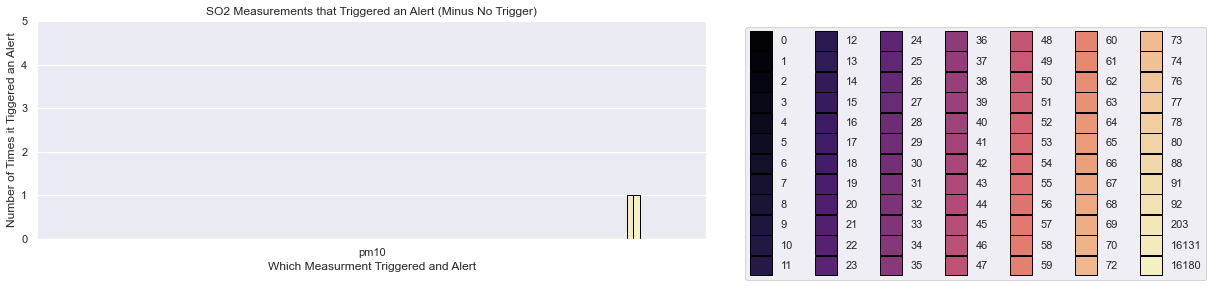

In [51]:
plt.figure(figsize=(12,4))
plot = sns.countplot(data=air_train, x='alert_triggered', hue='Pm10', palette='magma',edgecolor='black')
plot.set(xlim=(3.5, 4.5))
plot.set(ylim=(0, 5))
plt.title('SO2 Measurements that Triggered an Alert (Minus No Trigger)')
plt.xlabel('Which Measurment Triggered and Alert')
plt.ylabel('Number of Times it Tiggered an Alert')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=7,handleheight=2.4, labelspacing=0.05)


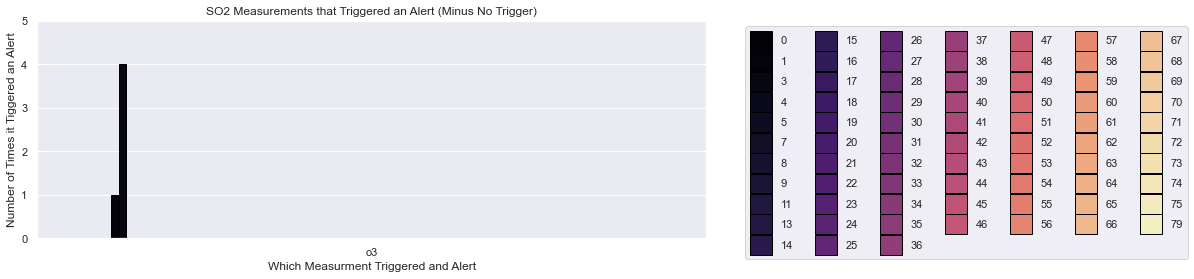

In [52]:
plt.figure(figsize=(12,4))
plot = sns.countplot(data=air_train, x='alert_triggered', hue='O3', palette='magma',edgecolor='black')
plot.set(xlim=(4.5, 5.5))
plot.set(ylim=(0, 5))
plt.title('SO2 Measurements that Triggered an Alert (Minus No Trigger)')
plt.xlabel('Which Measurment Triggered and Alert')
plt.ylabel('Number of Times it Tiggered an Alert')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=7,handleheight=2.4, labelspacing=0.05)


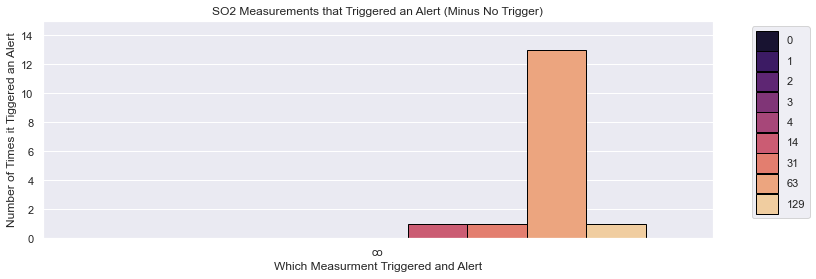

In [53]:
plt.figure(figsize=(12,4))
plot = sns.countplot(data=air_train, x='alert_triggered', hue='CO', palette='magma',edgecolor='black')
plot.set(xlim=(5.5, 6.5))
plot.set(ylim=(0, 15))
plt.title('SO2 Measurements that Triggered an Alert (Minus No Trigger)')
plt.xlabel('Which Measurment Triggered and Alert')
plt.ylabel('Number of Times it Tiggered an Alert')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)

In [54]:
air_train

,datetime,Pm1_0,Pm2_5,Pm10,SO2,O3,CO,NO2,alert_triggered,dates,...,weekday,AQI_CO,CO_24hr,AQI_CO_24hr,AQI_pm2_5,Pm_25_24hr,AQI_pm_25_24hr,AQI_pm10,Pm_10_24hr,AQI_pm10_24hr
5457,2021-05-08 08:30:26,6,8,10,0,0,2,0,None,2021-05-08,...,5,Good,-450.048513,NaN,Good,10.161189,Good,Good,-443.153365,NaN
18608,2021-05-17 10:25:00,0,13,0,0,17,0,8,None,2021-05-17,...,0,NaN,-166.418981,NaN,Moderate,14.702546,Moderate,NaN,-149.437500,NaN
2949,2021-05-14 11:31:23,11,11,14,0,0,0,0,None,2021-05-14,...,4,Good,-230.873896,NaN,Good,12.546988,Moderate,Good,-219.945382,NaN
10940,2021-04-22 03:13:32,9,8,11,0,0,0,1,no2,2021-04-22,...,3,Good,0.056818,Good,Good,18.247159,Moderate,Good,22.963068,Good
19244,2021-05-15 15:25:00,0,8,0,0,32,0,8,None,2021-05-15,...,5,NaN,-166.476852,NaN,Good,10.666667,Good,NaN,-154.821759,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,2021-05-16 14:25:27,3,5,5,0,0,0,0,no2,2021-05-16,...,6,Good,-165.666667,NaN,Good,6.246528,Good,Good,-159.733796,NaN
8155,2021-04-30 07:48:27,16,17,21,0,0,0,1,no2,2021-04-30,...,4,Good,0.019774,Good,Moderate,9.028249,Good,Good,11.062147,Good
5460,2021-05-08 09:00:30,7,7,9,0,0,2,0,None,2021-05-08,...,5,Good,-450.048513,NaN,Good,10.161189,Good,Good,-443.153365,NaN
6493,2021-05-05 04:58:32,3,3,3,0,0,1,0,None,2021-05-05,...,2,Good,-450.050078,NaN,Good,4.018779,Good,Good,-448.007825,NaN


<Figure size 1152x576 with 0 Axes>

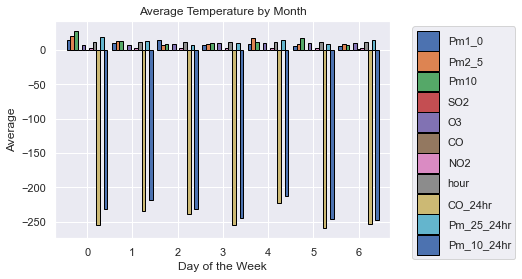

In [55]:
plt.figure(figsize=(16,8))
plot = air_train.groupby('weekday').mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
plot.set(title='Average Temperature by Month', xlabel='Day of the Week', ylabel='Average')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', 
           ncol=1,handleheight=2.4, labelspacing=0.05)